In [2]:
import os
import pandas as pd
import json
import shapely

In [3]:
import matplotlib.pyplot as plt

In [4]:
from matplotlib.patches import Polygon as mPolygon

In [5]:
%matplotlib inline

In [6]:
with open('municipalities.json') as f:
    content = json.load(f)

In [7]:
from shapely.geometry import Polygon, mapping
from shapely.ops import cascaded_union

In [8]:
Polygon()

In [9]:
features = content['features']

In [10]:
a = next(filter(lambda x: x['properties']['Name'] == 'Asikkala', features), None)
p = next(filter(lambda x: x['properties']['Name'] == 'Padasjoki', features), None)

In [11]:
a_geo = a['geometry']['coordinates'][0]
p_geo = p['geometry']['coordinates'][0]

In [12]:
casc = cascaded_union([Polygon(a_geo), Polygon(p_geo)])

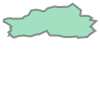

In [17]:
Polygon(a_geo)

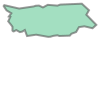

In [19]:
Polygon(p_geo)

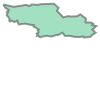

In [15]:
Polygon(casc)

In [ ]:
fig = plt.figure(1, dpi=90)
ax = fig.add_subplot(111)
ax.add_patch(mPolygon(a_geo))
ax.add_patch(mPolygon(p_geo))
ax.axis('scaled')

In [ ]:
with open('sairaanhoitopiirit.json') as f:
    shpt = json.load(f)

In [ ]:
from collections import defaultdict

In [ ]:
d = defaultdict(list)
for shp in shpt:
    d[shp['shp']].append(shp['kunta'])

In [ ]:
def merge_polygons(li):
    current_polygon = Polygon(li[0])
    for i in li[1:]:
        polygon = cascaded_union((Polygon(i), current_polygon))
    return current_polygon
        

In [ ]:
with open('municipalities.json') as f:
    municipalities = json.load(f)['features']

In [ ]:
def get_municipality_geo(name):
    for i in municipalities:
        if i['properties']['Name'].lower() == name.lower():
            return i['geometry']['type'], i['geometry']['coordinates']
    return []

In [ ]:
hus_geos = [get_municipality_geo(i) for i in d['HUS']]

In [ ]:
polys = []
for type_, geom in hus_geos:
    if type_ == 'Polygon':
        polys.extend(geom)
    if type_ == 'MultiPolygon':
        polys.extend([ii for i in geom for ii in i])

In [ ]:
fig = plt.figure(1, dpi=90)
ax = fig.add_subplot(111)
for p in polys:
    ax.add_patch(mPolygon(p))
ax.axis('scaled')

In [ ]:
bins = []

for p in polys:
    for b in bins:
        polys_in_bin = (Polygon(bb) for bb in b)
        if any(Polygon(p).intersects(Polygon(bb)) for bb in polys_in_bin):
            b.append(p)
            break
    else:
        bins.append([p])


In [ ]:
unions = []
for b in bins:
    if len(b) > 1:
        unions.append(merge_polygons(b))
    else:
        unions.append(Polygon(b[0]))

In [ ]:
unions[2]

In [ ]:
unions

In [ ]:
fig = plt.figure(1, dpi=90)
ax = fig.add_subplot(111)
for p in unions[:2]:
    ax.add_patch(mPolygon(p))
ax.axis('scaled')

In [ ]:
from shapely.geometry import Polygon
p1 = Polygon([(0,0), (1,0), (1, 1), (0,1)])
p2 = Polygon([(1,1), (2,1), (2, 2), (1,2)])
print(p1.intersects(p2))